<h1>Neural Networks</h1>
<h3>Data 602: Week 10 Assignment</h3>
<h3>Submitted By: Srashti Soni</h3>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes2.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Plotting the histograms of the variables.
from matplotlib import pyplot as plt

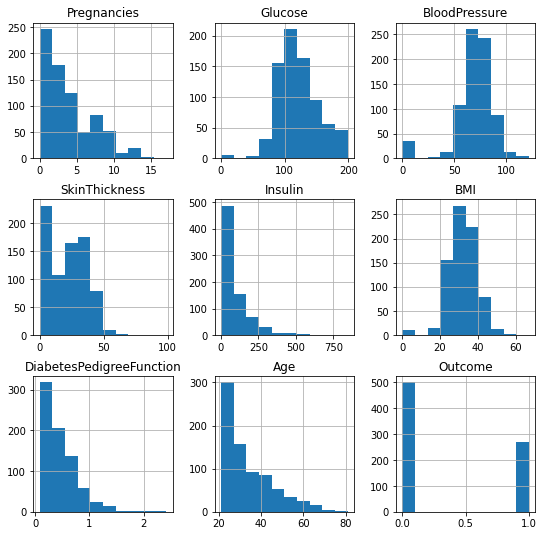

In [5]:
df.hist(figsize=(9, 9))
plt.show()

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


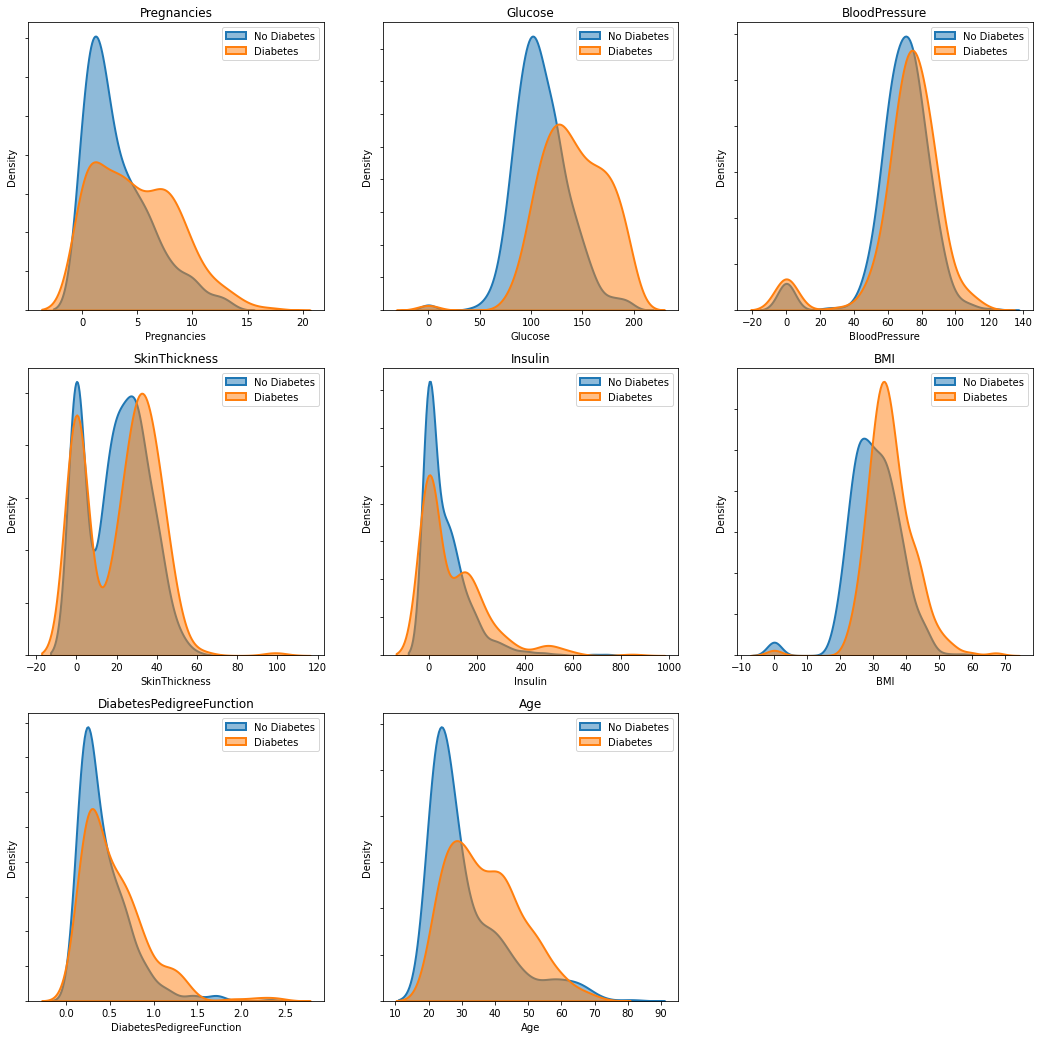

In [6]:
#Visualizing the difference in distribution between diabetics and non-diabetics with separate plots using Seaborn.
import seaborn as sns
#creating a subplot of 3X3
plt.subplots(3,3,figsize=(18,18))

#Plotting the density for each variable
for index, column in enumerate(df.columns):
    axis= plt.subplot(3,3, index+1)
    axis.yaxis.set_ticklabels([])
    sns.kdeplot(df.loc[df.Outcome == 0] [column],fill=True, common_norm=False, palette="crest",
                alpha=.5, linewidth=2, label="No Diabetes", warn_singular=False)
    sns.kdeplot(df.loc[df.Outcome == 1] [column], fill=True, common_norm=False, palette="crest",
                alpha=.5, linewidth=2, label="Diabetes", warn_singular=False)
    axis.legend()
    axis.set_title(column)
    
    
#Hiding the 9th subplot
plt.subplot(3,3,9).set_visible(False)
plt.show()

In [7]:
#checking missing values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can observer that the minimum value of columns Pregnancies, Glucose, BloodPressue, SkinThickness, Insulin and BMI is zero which makes no sense because these values cannot be zero. This means that there are missing values in our dataset. We will check how many 0 values are there in each column of our dataset.

In [9]:
print("Number of rows with 0 values for each column:")
for column in df.columns:
    missing_rows = df.loc[df[column]==0].shape[0]
    print(column + ":" +str(missing_rows))

Number of rows with 0 values for each column:
Pregnancies:111
Glucose:5
BloodPressure:35
SkinThickness:227
Insulin:374
BMI:11
DiabetesPedigreeFunction:0
Age:0
Outcome:500


In [10]:
# Replacing the 0 values of Glucose, BloodPressure, SkinThickness, Insulin and BMI to a NaN value
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [11]:
#Checking the 0 values again, if any
print("Number of rows with 0 values for each column:")
for column in df.columns:
    missing_rows = df.loc[df[column]==0].shape[0]
    print(column + ":" +str(missing_rows))

Number of rows with 0 values for each column:
Pregnancies:111
Glucose:0
BloodPressure:0
SkinThickness:0
Insulin:0
BMI:0
DiabetesPedigreeFunction:0
Age:0
Outcome:500


In [12]:
#Replacing the NaN values with the mean of the non-missing values.
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [13]:
#Standardizing the data
from sklearn import preprocessing

In [14]:
scaled_df = preprocessing.scale(df)

In [15]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [16]:
#Since we do not want to scale the outcome column as it is our target variable, assigning to its original values
scaled_df['Outcome'] = df['Outcome']
df = scaled_df

In [17]:
df.describe().loc[['mean','std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


In [18]:
#Creating a train and test set (80/20)
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
#Second split for final training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [22]:
#Using the sequential class from Keras to build the MLP
from keras.models import Sequential
model = Sequential()

In [23]:
#adding hidden layers
from keras.layers import Dense
#adding first hidden layer
model.add(Dense(32, activation='relu', input_dim=8))

In [24]:
#Adding second hidden layer
model.add(Dense(16, activation='relu'))

In [25]:
#Adding the output layer
model.add(Dense(1, activation='sigmoid'))

In [26]:
#model compilation - . Using ‘adam’ optimizer and ‘binary crossentropy’ loss
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<h3>Cross- Entropy:</h3> Cross-entropy builds upon the idea of information theory entropy(randomness) and measures the difference between two probability distributions for a given random variable/set of events.Cross entropy can be applied in both binary and multi-class classification problems. Here, we are using binary cross entropy as our loss function because the problem is a binary classification problem, whether the patient is diabetic or not.

In [27]:
#training the model for 100 epochs
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
16/16 [==============================] - 2s 6ms/step - loss: 0.7644 - accuracy: 0.3422
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.5092
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6461 - accuracy: 0.6253
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6080 - accuracy: 0.6802
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5779 - accuracy: 0.6864
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5515 - accuracy: 0.6904
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5325 - accuracy: 0.7169
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5164 - accuracy: 0.7393
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5036 - accuracy: 0.7536
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4934 - accuracy: 0.7637
Epoch 11/

In [28]:
#training the model for 200 epochs
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
16/16 [==============================] - 0s 3ms/step - loss: 0.3287 - accuracy: 0.8574
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 0.3285 - accuracy: 0.8554
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.8534
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 0.3251 - accuracy: 0.8534
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3244 - accuracy: 0.8595
Epoch 6/200
16/16 [==============================] - 0s 3ms/step - loss: 0.3234 - accuracy: 0.8595
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3224 - accuracy: 0.8595
Epoch 8/200
16/16 [==============================] - 0s 6ms/step - loss: 0.3204 - accuracy: 0.8615
Epoch 9/200
16/16 [==============================] - 0s 6ms/step - loss: 0.3195 - accuracy: 0.8554
Epoch 10/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3196 - accuracy: 0.8574
Epoch 11/

<h3>What is the outcome of 100 and 200 epochs? Any difference? Explain.</h3>
We can clearly see that,as the learning algorithm continuously updates the weights and biases in the MLP according to the training data, the loss function decreases as the epochs increase and accuracy increases throughout each epoch for both 100 and 200 epochs.

In [29]:
#Evaluating the training and testing dataset's accuracy
scores= model.evaluate(X_train,y_train)
print("Accuracy of training data: %.2f%%\n" % (scores[1]*100))

16/16 [==============================] - 0s 4ms/step - loss: 0.1531 - accuracy: 0.9409
Accuracy of training data: 94.09%



In [30]:
#Accuracy of testing data
scores= model.evaluate(X_test,y_test)
print("Accuracy of testing data: %.2f%%\n" % (scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.6356 - accuracy: 0.7468
Accuracy of testing data: 74.68%



In [31]:
#Provide the confusion matrix using Seaborn. What are your conclusions?
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
#classes_x=np.argmax(predictions,axis=1)

In [32]:
con_matrix = confusion_matrix(y_test, predictions.round())

Text(33.0, 0.5, 'Actual')

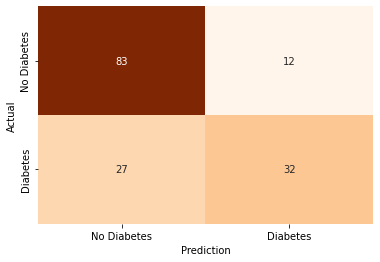

In [33]:
ax = sns.heatmap(con_matrix, annot=True, xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'],
                cbar=False, cmap='Oranges')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

<h4> Conclusion:</h4> We can observe from the confusion matrix that the majority of the predictions are true negatives or true positives. The remaining 12 predictions are false positives, whereas the other 27 are false negatives, which is not a good thing. A false negative is perhaps more dangerous than a false positive when it comes to diabetes prediction. A false negative is when a doctor tells a patient that they will not get diabetes in the following five years when they will. As a result, when comparing the performance of various models for predicting the development of diabetes, a model with a lower false negative rate is preferable, which is not ideal in our situation.

In [34]:
#ROC Curve
from sklearn.metrics import roc_curve
y_test_pred_probs= model.predict(X_test)

Text(0, 0.5, 'True Positive Rate')

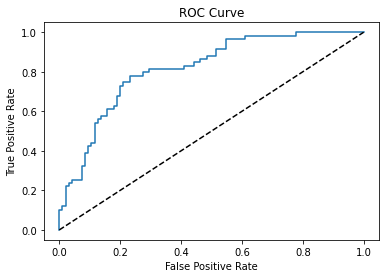

In [35]:
FPR, TPR, _ = roc_curve(y_test,y_test_pred_probs )

#plotting the values using matplotlib
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<h4>What is the area under the curve? What are your conclusions?</h4>
From the ROC curve we can clearly observe that the AUC is higher which means that the model is better at predicting the classes.<br> This shows that our model is able to differentiate samples of different classes, making good predictions.

<h4>Is the MLP better than a logistic regression model? Do you get a better accuracy with
a Random Forest model? Why? Show the outcomes of the different models in a table
format.</h4>

I believe that fine-tuning the MLP classifier will yield superior results, possibly even outperforming the Logistic Regression model. The learning rate can be altered to optimize the gradient descent optimization process and prevent local minima, and the number of hidden layers and nodes can be adjusted to find a more appropriate neural network architecture for the task at hand. I also believe that increasing the amount of the training data set will result in a more accurate model. Multilayer Perceptron learners are powerful, but if the network is larger than what is required for the underlying data structure, overfitting can occur.

Yes, we get better accuracy from random forest(75.06%) than MLP(74.68%). Using ‘wisdom of the crowds’ approach, random forest regression achieves extremely high accuracies. It usually produces better results than other linear models, including linear regression and logistic regression. While growing the trees, the random forest adds more randomness to the model. When splitting a node, it looks for the best feature from a random subset of features rather than the most essential feature. As a result, there is a lot of variety, which leads to a better model with extremely high accuracy.

In [36]:
pip install pycaret

In [37]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'Outcome')
# return best model
best = compare_models()
# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)
# return best model based on AUC
best = compare_models() #default is 'Accuracy'
# compare specific models
best_specific = compare_models(include = ['lr','rf','mlp'])
# blacklist certain models
best_specific = compare_models(exclude = ['svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7654,0.8410,0.5508,0.7442,0.6246,0.4614,0.4774,0.019
lr,Logistic Regression,0.7653,0.8403,0.5613,0.7362,0.6284,0.4636,0.4777,0.022
ridge,Ridge Classifier,0.7635,0.0000,0.5403,0.7464,0.6189,0.4553,0.4725,0.017
rf,Random Forest Classifier,0.7506,0.8293,0.5918,0.6786,0.6289,0.4430,0.4477,0.524
gbc,Gradient Boosting Classifier,0.7469,0.8161,0.6032,0.6633,0.6288,0.4384,0.4415,0.125
et,Extra Trees Classifier,0.7466,0.8228,0.5818,0.6733,0.6206,0.4330,0.4378,0.537
knn,K Neighbors Classifier,0.7408,0.7885,0.6174,0.6339,0.6206,0.4266,0.4282,0.121
lightgbm,Light Gradient Boosting Machine,0.7391,0.8071,0.6232,0.6361,0.6269,0.4272,0.4292,0.055
nb,Naive Bayes,0.7375,0.8106,0.5718,0.6569,0.6074,0.4131,0.4177,0.019
qda,Quadratic Discriminant Analysis,0.7338,0.8030,0.5568,0.6579,0.5963,0.4021,0.4094,0.019
